In [0]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [0]:
print(train_images.shape[1:])

(28, 28)


In [0]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [0]:
train_data /=255.0
test_data /=255.0

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2726 - acc: 0.9158 - val_loss: 0.1379 - val_acc: 0.9546
Epoch 2/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0938 - acc: 0.9705 - val_loss: 0.0841 - val_acc: 0.9705
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0590 - acc: 0.9816 - val_loss: 0.0754 - val_acc: 0.9760
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0409 - acc: 0.9867 - val_loss: 0.0702 - val_acc: 0.9787
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0303 - acc: 0.9901 - val_loss: 0.0666 - val_acc: 0.9812
Epoch 6/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0778 - val_acc: 0.9793
Epoch 7/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0176 - acc: 0.9940 - val_loss: 0.0818 - val

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


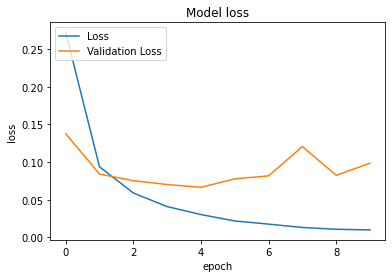

In [0]:
#1st Solution:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')
plt.show()

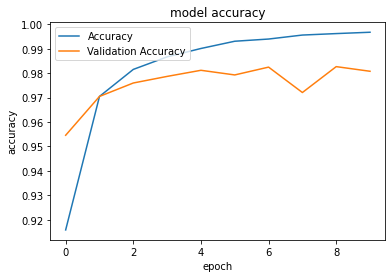

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

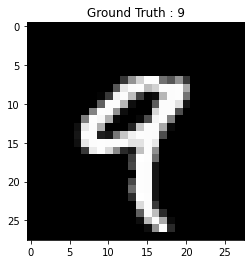

In [0]:
# 2nd Solution:

import matplotlib.pyplot as plt
plt.imshow(train_images[4,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[4]))
plt.show()

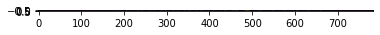

In [0]:
import matplotlib.pyplot as plt
plt.imshow(test_data[[4],:])

In [0]:
x=model.predict_classes(test_data[[4],:])
print("prediction",train_labels[x])

prediction [9]
